In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Credit Card Default.csv")
df

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0


In [4]:
#Data wroangling and cleaning

#Removing the 'clientid' column as it's only a unique identifier and doesn't add any value
df = df.drop('clientid', axis = 1)

In [5]:
#Summary statistics of the dataset
df.describe

#Minimum 'age' value is -52, which isn't possible as age cannot be negative <-- Need to clean this up

#Checking for all age values <= 0
df[df.age <= 0]

#There are 3 rows, and we must remove them
df = df.drop(df[df.age <= 0].index, axis = 0)
df #(Shape = 1997, 4)

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0
1996,69516.12757,23.162104,3503.176156,0
1997,44311.44926,28.017167,5522.786693,1
1998,43756.05660,63.971796,1622.722598,0


In [6]:
#Checking for NA value

df.isnull().sum()
#3 age values are null, and we must remove them

#Checking which age values are null
df[df.isnull().any(axis = 1)]

#Removing these rows
df = df.dropna(axis = 0)
df #(Shape = 1994, 4)

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0
1996,69516.12757,23.162104,3503.176156,0
1997,44311.44926,28.017167,5522.786693,1
1998,43756.05660,63.971796,1622.722598,0


In [7]:
#Checking for duplicates
df.duplicated().any() #False
#Hence, we can conclude there are no duplicates

False

In [8]:
#Checking for non-numeric inputs

df.dtypes
#Initial impressions show no textual inputs are present, as all columns have integer/float data types

for i in df.columns:
    df = df[pd.to_numeric(df[i], errors = 'coerce').notnull()]
df
#df shape = (1994, 4)

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0
1996,69516.12757,23.162104,3503.176156,0
1997,44311.44926,28.017167,5522.786693,1
1998,43756.05660,63.971796,1622.722598,0


In [9]:
#Outlier Removal
import numpy as np
from scipy import stats

z_scores = stats.zscore(df.astype(np.float))
filter = (np.abs(z_scores) < 3).all(axis = 1)
df = df[filter]
df
#df shape = (1994, 3) <-- 1 outlier removed

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0
1996,69516.12757,23.162104,3503.176156,0
1997,44311.44926,28.017167,5522.786693,1
1998,43756.05660,63.971796,1622.722598,0


In [10]:
#Normalisation

from statistics import stdev

X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

for i in X.columns:
    X[i] = (X[i] - X[i].mean())/stdev(X[i])
X

,income,age,loan
0,1.455269,1.362809,1.206381
1,-0.761279,0.541720,0.699293
2,0.838034,1.670987,1.178234
3,-0.182059,0.363550,0.547638
4,1.510909,-1.682994,1.424625
...,...,...,...
1995,0.970987,0.571929,-0.826132
1996,1.689921,-1.338149,-0.307645
1997,-0.070193,-0.972417,0.356597
1998,-0.108977,1.736053,-0.926119


In [11]:
#Categorical Inputs

#As the dataset does not contain any categorical inputs other than the target varaible, we do not need to get dummy variables

In [12]:
#Checking for potential class imbalance

df['default'].value_counts()
#Hence, there is a class imbalance, and we will need to use SMOTE to balance the data

0    1710
1     283
Name: default, dtype: int64

In [13]:
#Fixing the class imbalance

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

#Comparing the before-and-after results
print(f"""Original
{df['default'].value_counts()}""")
print()
print(f"""After
{Y.value_counts()}""")

#Hence, the class imbalance has been taken care of

Original
0    1710
1     283
Name: default, dtype: int64

After
1    1710
0    1710
Name: default, dtype: int64


In [14]:
#Train test split for modelling

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [15]:
#===================================================LOGISTIC REGRESSION=========================================================

#Model Assumptions:
#1. The observations are independent of each other
#2. There should be little or no multicollinearity, i.e. the independent variables should not be highly correlated
#3. The independent variables should be linearly related to the log odds

#Running a basic logistic regression model
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

#Creating and fitting the model
log_reg_model = linear_model.LogisticRegression()
log_reg_model.fit(X_train, Y_train)

#Evaluating model performance - Trainset
log_reg_pred_train = log_reg_model.predict(X_train)
log_reg_cm_train = confusion_matrix(log_reg_pred_train, Y_train)
log_reg_cm_train

#Model accuracy - Trainset
log_reg_accuracy_train = (log_reg_cm_train[0, 0] + log_reg_cm_train[1, 1])/sum(sum(log_reg_cm_train))
log_reg_accuracy_train
#93.98%

#Evaluating model performance - Testset
log_reg_pred_test = log_reg_model.predict(X_test)
log_reg_cm_test = confusion_matrix(log_reg_pred_test, Y_test)
log_reg_cm_test

#Model accuracy - Testset
log_reg_accuracy_test = (log_reg_cm_test[0, 0] + log_reg_cm_test[1, 1])/sum(sum(log_reg_cm_test))
log_reg_accuracy_test #0.9541910331384016

0.9541910331384016

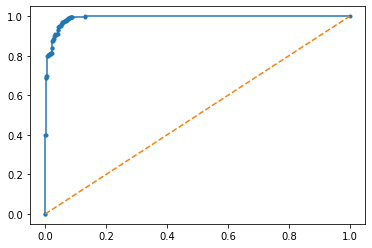

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

ns_probs = [0 for _ in range(len(Y_test))]
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)

log_reg_probs = log_reg_model.predict_proba(X_test)
log_reg_probs = log_reg_probs[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, log_reg_probs)
plt.plot(fpr, tpr, marker = '.', label = 'Logistic Regression Model')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

In [17]:
#Optimisation of the hyperparameters for our logistic regression model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from datetime import datetime

#Creating a validation set to see the results of hyperparameter tuning
X_train1, X_validate, Y_train1, Y_validate = train_test_split(X_train, Y_train, test_size = 0.3)

cv = RepeatedStratifiedKFold(n_splits = 20, n_repeats = 3, random_state = 1)

#Defining the search space
search_grid_log_reg = dict()
search_grid_log_reg['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
search_grid_log_reg['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
search_grid_log_reg['C'] = loguniform(1e-5, 100)

#Defining the search
start_time = datetime.now().strftime("%H:%M:%S")
search = RandomizedSearchCV(log_reg_model, search_grid_log_reg, n_iter = 500, scoring = 'accuracy', n_jobs = -1, cv = cv, random_state = 1)
result = search.fit(X_validate, Y_validate)
end_time = datetime.now().strftime("%H:%M:%S")
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_) #{'C': 0.11860397910260653, 'penalty': 'l2', 'solver': 'newton-cg'}

format = "%H:%M:%S"
time_elapsed = datetime.strptime(end_time, format) - datetime.strptime(start_time, format)
print(f"Time elapsed: {time_elapsed}")

Best Score: 0.9392460317460318
Best Hyperparameters: {'C': 0.11860397910260653, 'penalty': 'l2', 'solver': 'newton-cg'}
Time elapsed: 0:00:47


C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.93414021        nan 0.93414021        nan 0.89656085 0.90399471
 0.82791005 0.50904762        nan        nan        nan        nan
 0.93414021        nan 0.93691799        nan        nan 0.93414021
 0.50904762        nan 0.93506614 0.7830291  0.93414021 0.50904762
 0.93506614        nan 0.93414021        nan 0.93414021 0.93367725
 0.59112434        nan 0.93414021        nan 0.93414021 0.93599206
        nan 0.93414021 0.50904762        nan 0.92624339 0.93275132
 0.50904762 0.8942328         nan 0.64907407        nan        nan
        nan        nan        nan 0.93414021        nan 0.93414021
        nan 0.93414021        nan        nan        nan        nan
 0.93414021        nan 0.93228836 0.90724868        nan 0.82890212
        nan 0.93691799 0.93414021 0.50904762        nan        nan
        nan        nan 0.93414021 0

In [19]:
#Using the tuned hyperparameters to re-train the model with the optimised parameters and compare testset accuracy
log_reg_model_tuned = linear_model.LogisticRegression(C = 0.11860397910260653, penalty = 'l2', solver = 'newton-cg')
log_reg_model_tuned.fit(X_train, Y_train)

#Evaluating Model Performance
log_reg_tuned_pred_test = log_reg_model_tuned.predict(X_test)
log_reg_tuned_cm = confusion_matrix(log_reg_tuned_pred_test, Y_test)
log_reg_tuned_accuracy_test = (log_reg_tuned_cm[0, 0] + log_reg_tuned_cm[1, 1])/sum(sum(log_reg_tuned_cm))
print(f"Testset accuracy before tuning: {log_reg_accuracy_test}") #0.9454191033138402
print(f"Testset accuracy after tuning: {log_reg_tuned_accuracy_test}") #0.9551656920077972

#This is the final, tuned logistic regression model

Testset accuracy before tuning: 0.9541910331384016
Testset accuracy after tuning: 0.9551656920077972


In [18]:
#======================================================DECISION TREE============================================================

#Assumptions:
#1. In the beginning, the entire training data is considered as the root
#2. The records are distributed recursively on the basis of the attribute value.

#Running a decision tree model
from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, Y_train)

#Evaluating model performance - Trainset
dec_tree_pred_train = dec_tree_model.predict(X_train)
dec_tree_cm_train = confusion_matrix(dec_tree_pred_train, Y_train)
dec_tree_accuracy_train = (dec_tree_cm_train[0, 0] + dec_tree_cm_train[1, 1])/sum(sum(dec_tree_cm_train))
print(f"Trainset accuracy of the base decision tree model: {dec_tree_accuracy_train}") #Overfitted

Trainset accuracy of the base decision tree model: 1.0


In [118]:
#Limiting maximum tree depth
dec_tree_model.get_depth() #10 - No wonder it overfitted by a lot

#Setting the max_depth to 5 to prevent overfitting - Will tune this later
dec_tree_model = DecisionTreeClassifier(max_depth = 5)
dec_tree_model.fit(X_train, Y_train)

#Evaluating model performance - Trainset
dec_tree_pred_train = dec_tree_model.predict(X_train)
dec_tree_cm_train = confusion_matrix(dec_tree_pred_train, Y_train)
dec_tree_accuracy_train = (dec_tree_cm_train[0, 0] + dec_tree_cm_train[1, 1])/sum(sum(dec_tree_cm_train))
print(f"Trainset accuracy of the base decision tree model: {dec_tree_accuracy_train}") #98.57%

#Evaluating model performance - Testset
dec_tree_pred_test = dec_tree_model.predict(X_test)
dec_tree_cm_test = confusion_matrix(dec_tree_pred_test, Y_test)
dec_tree_accuracy_test = (dec_tree_cm_test[0, 0] + dec_tree_cm_test[1, 1])/sum(sum(dec_tree_cm_test))
print(f"Testset accuracy of the base decision tree model: {dec_tree_accuracy_test}") #97.46%

#Seems to be reasonable, given that the logistic regression model obtained an accuracy of 94.73%

Trainset accuracy of the base decision tree model: 0.9782790309106099
Testset accuracy of the base decision tree model: 0.9766081871345029


In [56]:
#Hyperparameter optimisation for the decision tree model

#No need to split into the validation sets again - We can use the ones splitted previously
cv = RepeatedStratifiedKFold(n_splits = 20, n_repeats = 3, random_state = 1)

#Defining the search space
search_grid_dec_tree = dict()
search_grid_dec_tree['criterion'] = ['gini', 'entropy']
#search_grid_dec_tree['min_samples_split'] = np.arange(start = 19, stop = 30, step = 1) #Chose not to optimise min_samples_split as the result would overlap with max_depth
search_grid_dec_tree['max_depth'] = [3, 4, 5] 
search_grid_dec_tree['max_features'] = ['auto', 'sqrt', 'log2']
search_grid_dec_tree['ccp_alpha'] = loguniform(1e-5, 100)

#Defining the search
start_time = datetime.now().strftime("%H:%M:%S")
search = RandomizedSearchCV(dec_tree_model, search_grid_dec_tree, n_iter = 500, scoring = 'accuracy', n_jobs = -1, cv = cv, random_state = 1)
result = search.fit(X_validate, Y_validate)
end_time = datetime.now().strftime("%H:%M:%S")
print('Best Score: %s' % result.best_score_) 
print('Best Hyperparameters: %s' % result.best_params_) 

format = "%H:%M:%S"
time_elapsed = datetime.strptime(end_time, format) - datetime.strptime(start_time, format)
print(f"Time elapsed: {time_elapsed}")

Best Score: 0.9359523809523809
Best Hyperparameters: {'ccp_alpha': 0.01926059437058802, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}
Time elapsed: 0:01:11


In [155]:
#Using the tuned hyperparameters to re-train the model with the optimised parameters and compare testset accuracy
dec_tree_model_tuned = DecisionTreeClassifier(ccp_alpha = 0.003900131433342812, criterion = 'gini', max_depth = 5, max_features = 'auto')
dec_tree_model_tuned.fit(X_train, Y_train)

#Evaluating Model Performance
dec_tree_tuned_pred_test = dec_tree_model_tuned.predict(X_test)
dec_tree_tuned_cm = confusion_matrix(dec_tree_tuned_pred_test, Y_test)
dec_tree_tuned_accuracy_test = (dec_tree_tuned_cm[0, 0] + dec_tree_tuned_cm[1, 1])/sum(sum(dec_tree_tuned_cm))
print(f"Testset accuracy before tuning: {dec_tree_accuracy_test}") #0.9766081871345029
print(f"Testset accuracy after tuning: {dec_tree_tuned_accuracy_test}") #0.9853801169590644

#This is the decision tree model after tuning

Testset accuracy before tuning: 0.9766081871345029
Testset accuracy after tuning: 0.9853801169590644


In [27]:
#==================================================RANDOM FOREST================================================================

#No formal assumptions

#Running a base random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

#Evaluating model performance - Trainset
rf_model_pred_train = rf_model.predict(X_train)
rf_model_cm_train = confusion_matrix(rf_model_pred_train, Y_train)
rf_model_accuracy_train = (rf_model_cm_train[0, 0] + rf_model_cm_train[1, 1])/sum(sum(rf_model_cm_train))
rf_model_accuracy_train #100%

#Evaluating model performance - Testset
rf_model_pred_test = rf_model.predict(X_test)
rf_model_cm_test = confusion_matrix(rf_model_pred_test, Y_test)
rf_model_accuracy_test = (rf_model_cm_test[0, 0] + rf_model_cm_test[1, 1])/sum(sum(rf_model_cm_test))
rf_model_accuracy_test #0.9970760233918129

0.9970760233918129

In [ ]:
#Hyperparameter tuning for Random Forest model

cv = RepeatedStratifiedKFold(n_splits = 20, n_repeats = 3, random_state = 1)

#Defining the search space
search_grid_rf = dict()
search_grid_rf['max_features'] = [1, 2, 3]
search_grid_rf['n_estimators'] = np.arange(start = 100, stop = 800, step = 50)
search_grid_rf['ccp_alpha'] = loguniform(1e-5, 100)

#Defining the search
start_time = datetime.now().strftime("%H:%M:%S")
search = RandomizedSearchCV(rf_model, search_grid_rf, n_iter = 500, scoring = 'accuracy', n_jobs = -1, cv = cv, random_state = 1)
result = search.fit(X_validate, Y_validate)
end_time = datetime.now().strftime("%H:%M:%S")
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_) #{'ccp_alpha': 4.6711245817425396e-05, 'max_features': 1, 'n_estimators': 450}

format = "%H:%M:%S"
time_elapsed = datetime.strptime(end_time, format) - datetime.strptime(start_time, format)
print(f"Time elapsed: {time_elapsed}")

In [29]:
#Using the tuned hyperparameters to re-train the model with the optimised parameters and compare testset accuracy

rf_model_tuned = RandomForestClassifier(ccp_alpha = 4.6711245817425396e-05, max_features = 1, n_estimators = 450)
rf_model_tuned.fit(X_train, Y_train)

#Evaluating the tuned model on the testset
rf_model_tuned_pred_test = rf_model_tuned.predict(X_test)
rf_model_tuned_cm_test = confusion_matrix(rf_model_tuned_pred_test, Y_test)
rf_model_tuned_accuracy_test = (rf_model_tuned_cm_test[0, 0] + rf_model_tuned_cm_test[1, 1])/sum(sum(rf_model_tuned_cm_test))
    
print(f"Testset accuracy before tuning: {rf_model_accuracy_test}") #0.9970760233918129
print(f"Testset accuracy after tuning: {rf_model_tuned_accuracy_test}") #0.9980506822612085

Testset accuracy before tuning: 0.9970760233918129
Testset accuracy after tuning: 0.9980506822612085


In [30]:
#=======================================================XG BOOST================================================================

#Assumptions
#1. It may have an assumption that encoded integer value for each variable has an ordinal relation

#Running a base XG-Boost model
from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier()
xgb_model.fit(X_train, Y_train)

#Evaluating model performance - Trainset
xgb_model_pred_train = xgb_model.predict(X_train)
xgb_model_cm_train = confusion_matrix(xgb_model_pred_train, Y_train)
xgb_model_accuracy_train = (xgb_model_cm_train[0, 0] + xgb_model_cm_train[1, 1])/sum(sum(xgb_model_cm_train)) #100% <-- Overfitted

#Evaluating model performance - Testset
xgb_model_pred_test = xgb_model.predict(X_test)
xgb_model_cm_test = confusion_matrix(xgb_model_pred_test, Y_test)
xgb_model_accuracy_test = (xgb_model_cm_test[0, 0] + xgb_model_cm_test[1, 1])/sum(sum(xgb_model_cm_test))

print(f"Difference in accuracy (Trainset - Testset): {xgb_model_accuracy_train - xgb_model_accuracy_test}")

Difference in accuracy (Trainset - Testset): 0.001670843776106934


0.9970760233918129

In [31]:
#Limiting max_depth to prevent overfitting

xgb_model = GradientBoostingClassifier(max_depth = 2)
xgb_model.fit(X_train, Y_train)

#Evaluating model performance - Trainset
xgb_model_pred_train = xgb_model.predict(X_train)
xgb_model_cm_train = confusion_matrix(xgb_model_pred_train, Y_train)
xgb_model_accuracy_train = (xgb_model_cm_train[0, 0] + xgb_model_cm_train[1, 1])/sum(sum(xgb_model_cm_train))
xgb_model_accuracy_train

#Evaluating model performance - Testset
xgb_model_pred_test = xgb_model.predict(X_test)
xgb_model_cm_test = confusion_matrix(xgb_model_pred_test, Y_test)
xgb_model_accuracy_test = (xgb_model_cm_test[0, 0] + xgb_model_cm_test[1, 1])/sum(sum(xgb_model_cm_test))

print(f"Difference in accuracy (Trainset - Testset) after limiting max dept: {xgb_model_accuracy_train - xgb_model_accuracy_test}")
print("Although the difference is extremely small, the 2nd model (By limiting max_dept to 2) generalises better to unseen data, as shown by the above calculation")
print("Hence, will be proceeding to optimise the second model")

Difference in accuracy (Trainset - Testset) after limiting max dept: -0.001113895850737956
Although the difference is extremely small, the 2nd model (By limiting max_dept to 2) generalises better to unseen data, as shown by the above calculation
Hence, will be proceeding to optimise the second model


In [32]:
#Hyperparameter tuning for XGBoost model

cv = RepeatedStratifiedKFold(n_splits = 20, n_repeats = 3, random_state = 1)

#Defining the search space
search_grid_xgb = dict()
search_grid_xgb['learning_rate'] = [0.001, 0.01, 0.1]
search_grid_xgb['n_estimators'] = np.arange(start = 100, stop = 800, step = 50)
search_grid_xgb['subsample'] = [0.5, 0.7, 1.0]
search_grid_xgb['max_depth'] = [1, 2] #Not included 3 as 3 gives 100% trainset accuracy

#Defining the search
start_time = datetime.now().strftime("%H:%M:%S")
search = RandomizedSearchCV(xgb_model, search_grid_xgb, n_iter = 500, scoring = 'accuracy', n_jobs = -1, cv = cv, random_state = 1)
result = search.fit(X_validate, Y_validate)
end_time = datetime.now().strftime("%H:%M:%S")
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_) #{'subsample': 1.0, 'n_estimators': 750, 'max_depth': 2, 'learning_rate': 0.1}

format = "%H:%M:%S"
time_elapsed = datetime.strptime(end_time, format) - datetime.strptime(start_time, format)
print(f"Time elapsed: {time_elapsed}")

C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 252 is smaller than n_iter=500. Running 252 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Score: 0.9847222222222223
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 750, 'max_depth': 2, 'learning_rate': 0.1}
Time elapsed: 0:21:35


In [33]:
#Using the tuned hyperparameters to re-train the XGBoost model with the optimised parameters and compare testset accuracy

xgb_model_tuned = GradientBoostingClassifier(subsample = 1.0, n_estimators = 750, max_depth = 2, learning_rate = 0.1)
xgb_model_tuned.fit(X_train, Y_train)

#Evaluating the tuned model on the testset
xgb_model_tuned_pred_test = xgb_model_tuned.predict(X_test)
xgb_model_tuned_cm_test = confusion_matrix(xgb_model_tuned_pred_test, Y_test)
xgb_model_tuned_accuracy_test = (xgb_model_tuned_cm_test[0, 0] + xgb_model_tuned_cm_test[1, 1])/sum(sum(xgb_model_tuned_cm_test))
    
print(f"Testset accuracy before tuning: {xgb_model_accuracy_test}") #0.99317738791423
print(f"Testset accuracy after tuning: {xgb_model_tuned_accuracy_test}") #0.9941520467836257

Testset accuracy before tuning: 0.99317738791423
Testset accuracy after tuning: 0.9941520467836257


In [34]:
#===================================================NEURAL NETWORK==============================================================

#Assumptions
#1. Neurons are arranged in sequentially arranged layers
#2. Neurons within the same layer do not interact with/communicate to each other
#3. All inputs enter the network through the input layer and pass through the output layer
#4. All hidden layers at the same level have the same activation function
#5. Neurons in consecutive layers are densely connected
#6. Every inter-connected neural network has it’s own weight and biased associated with it

#Running a base neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout

nn_model = Sequential()
nn_model.add(Dense(10, input_dim = 3, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(10, activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation = 'sigmoid'))

nn_model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = 'accuracy')

nn_model.fit(X_train, Y_train, epochs = 100, verbose = 0)

In [36]:
#Evaluating model performance - Trainset
#Evaluation
nn_evaluation_accuracy_train = nn_model.evaluate(X_train, Y_train) #0.9983291625976562

#Prediction
nn_model_pred_train = nn_model.predict(X_train)
nn_model_pred_train = np.where(nn_model_pred_train>0.5, 1, 0)
nn_model_cm_train = confusion_matrix(nn_model_pred_train, Y_train)
nn_model_accuracy_train = (nn_model_cm_train[0, 0] + nn_model_cm_train[1, 1])/sum(sum(nn_model_cm_train)) #0.9983291562238931 

#Evaluating model performance - Testset
#Evaluation
nn_evaluation_accuracy_test = nn_model.evaluate(X_test, Y_test) #0.9990253448486328

#Prediction
nn_model_pred_test = nn_model.predict(X_test)
nn_model_pred_test = np.where(nn_model_pred_test>0.5, 1, 0)
nn_model_cm_test = confusion_matrix(nn_model_pred_test, Y_test)
nn_model_accuracy_test = (nn_model_cm_test[0, 0] + nn_model_cm_test[1, 1])/sum(sum(nn_model_cm_test)) #0.9990253411306043

33/33 [==============================] - 0s 716us/step - loss: 0.0079 - accuracy: 0.9990


0.9990253411306043